### TRABALHO LPA

A partir da base de dados precos_carros_brasil.csv, execute as seguintes tarefas:



#### iniciando as bibliotecas e fazendo imports

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.preprocessing import LabelEncoder

KeyboardInterrupt: 

---
### Análise Exploratória dos Dados

a. Carregue a base de dados media_precos_carros_brasil.csv

In [28]:
dados = pd.read_csv('database/precos_carros_brasil.csv')

In [8]:
dados.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

b. Verifique se há valores faltantes nos dados. Caso haja, escolha uma tratativa para
resolver o problema de valores faltantes

In [9]:
dados.isna().any()

year_of_reference     True
month_of_reference    True
fipe_code             True
authentication        True
brand                 True
model                 True
fuel                  True
gear                  True
engine_size           True
year_model            True
avg_price_brl         True
dtype: bool

In [10]:
dados.isna().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

In [29]:
dados.dropna(how="all", inplace=True)

c. Verifique se há dados duplicados nos dados

In [12]:
dados.duplicated().sum()

2

In [30]:
dados.drop_duplicates(inplace=True)

d. Crie duas categorias, para separar colunas numéricas e categóricas. Imprima o resumo de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)

In [14]:
# Criando categorias para separar colunas numéricas e categóricas
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

In [15]:
# Resumo das variáveis numéricas
dados[numericas_cols].describe()

,year_of_reference,year_model,avg_price_brl
count,202295.000000,202295.000000,202295.000000
mean,2021.564695,2011.271514,52756.765713
std,0.571904,6.376241,51628.912116
min,2021.000000,2000.000000,6647.000000
25%,2021.000000,2006.000000,22855.000000
50%,2022.000000,2012.000000,38027.000000
75%,2022.000000,2016.000000,64064.000000
max,2023.000000,2023.000000,979358.000000


In [16]:
# Resumo das variáveis categoricas
dados[categoricas_cols].describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202295,202295,202295,202295,202295,202295,202295,202295
unique,12,2091,202295,6,2112,3,2,29
top,January,003281-6,cfzlctzfwrcp,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,1,44962,425,168684,161883,47420


e. Imprima a contagem de valores por modelo (model) e marca do carro (brand)


In [17]:
dados.brand.value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64

In [18]:
dados.model.value_counts()

model
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: count, Length: 2112, dtype: int64

---
### Visualização dos Dados

a. Gere um gráfico da distribuição da quantidade de carros por marca


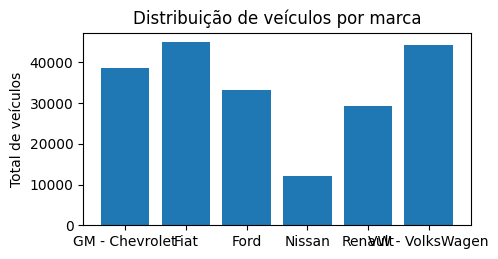

In [19]:
plt.figure(figsize=(5, 2.5))
plt.bar(dados.brand.unique(), dados.brand.value_counts()[dados.brand.unique()])
plt.title('Distribuição de veículos por marca')
plt.ylabel('Total de veículos');

Text(0, 0.5, 'Total de veículos')

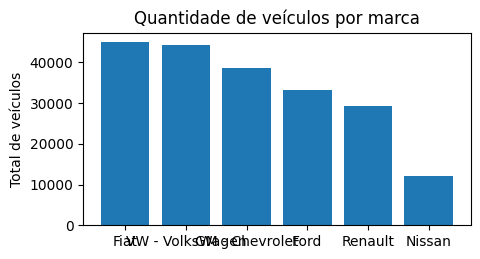

In [20]:
quantidadeMarca = dados['brand'].value_counts()

plt.figure(figsize=(5, 2.5))
plt.bar(quantidadeMarca.index, quantidadeMarca.values) # plt.bar para gráfico de barras. Variáveis nos eixos X e Y
plt.title('Quantidade de veículos por marca') # plt.title para inserir título no gráfico
plt.ylabel('Total de veículos') 

b. Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do
carro


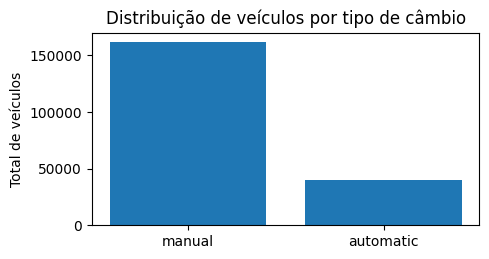

In [21]:
plt.figure(figsize=(5, 2.5))
plt.bar(dados.gear.unique(), dados.gear.value_counts()[dados.gear.unique()])
plt.title('Distribuição de veículos por tipo de câmbio')
plt.ylabel('Total de veículos');

c. Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de
2022 (variável de tempo no eixo X)

In [35]:
def atribui_numericos_mes(mes):
    if(mes == 'January'):
        return 1
    if(mes == 'February'):
        return 2
    if(mes == 'March'):
        return 3
    if(mes == 'April'):
        return 4
    if(mes == 'May'):
        return 5
    if(mes == 'June'):
        return 6
    if(mes == 'July'):
        return 7
    if(mes == 'August'):
        return 8
    if(mes == 'September'):
        return 9
    if(mes == 'October'):
        return 10
    if(mes == 'November'):
        return 11
    if(mes == 'December'):
        return 12
    
dados['month_of_reference'] = dados['month_of_reference'].apply(atribui_numericos_mes)
dados['month_of_reference'] = dados['month_of_reference'].astype('Int64')



In [36]:
ano2022 = dados.loc[dados.year_of_reference == 2022]
y = ano2022.groupby('month_of_reference').agg({'avg_price_brl':'mean'}).round(0)
print(y)

                    avg_price_brl
month_of_reference               
1                         54840.0
2                         55825.0
3                         56849.0
4                         57150.0
5                         57800.0
6                         58066.0
7                         57894.0
8                         57924.0
9                         58199.0
10                        58227.0
11                        58216.0
12                        57997.0


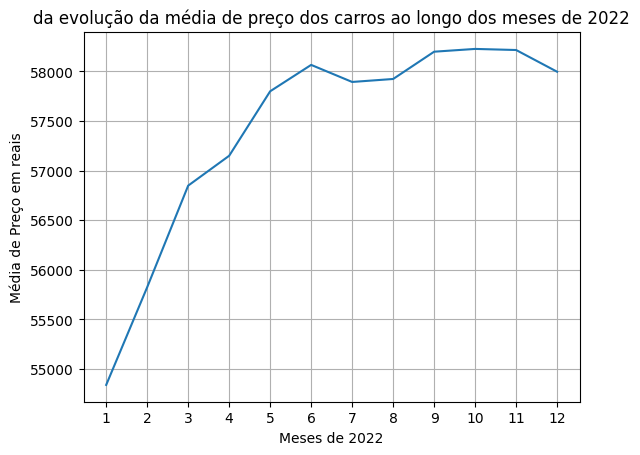

In [37]:
ano2022 = dados.loc[dados.year_of_reference == 2022]
y = ano2022.groupby('month_of_reference')['avg_price_brl'].mean().round(0)

#print(y)
plt.plot(y)
plt.grid()
plt.xticks(range(1,13))
plt.title('da evolução da média de preço dos carros ao longo dos meses de 2022')
plt.ylabel('Média de Preço em reais');
plt.xlabel('Meses de 2022')

plt.show()


d. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de engrenagem

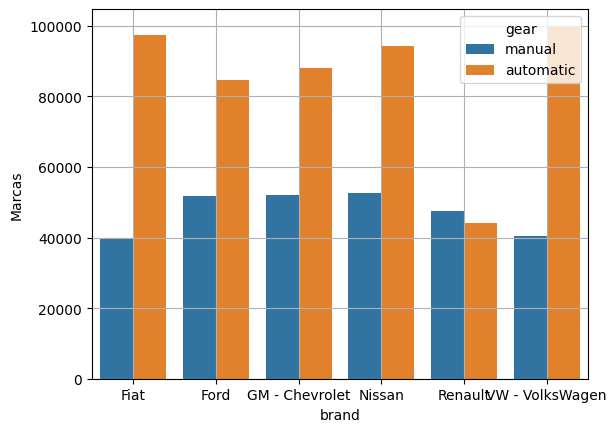

In [51]:
media_marcas = dados.groupby(['brand','gear'])['avg_price_brl'].mean().round(0)


media_marcas = media_marcas.reset_index(name = 'Marcas')
#print(media_marcas)

sns.barplot(x='brand', y='Marcas', hue='gear', data=media_marcas, hue_order=['manual', 'automatic'])
plt.grid()
plt.show()